In [2]:
import pandas as pd 
import xlwings as xw
path = '/Users/parkjunhyeok/Desktop/부동산데이터분석/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
wb = xw.Book(path)
sheet = wb.sheets['매매종합']
row_num = sheet.range('A1').end('down').end('down').end('down').row # 코드 수정
data_range = 'A2:GE' + str(row_num) # 범위 어떤 row부터 어디까지 row를 설정해주는거
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value




In [3]:
raw_data

,구분,전국,서울,강북,None,None,None,None,None,None,...,None,None,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,34.656084,30.043817,41.939986,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2.0,34.656084,30.043817,41.88915,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3.0,34.707965,30.002377,41.88915,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9.0,99.193357,98.007605,97.839253,99.073637,98.705734,97.095235,97.681804,97.907439,98.820704,...,101.421388,100.596436,None,None,101.125117,101.86865,None,None,100.145777,100.63901
395,10.0,99.750306,99.410296,99.243866,99.82197,99.401163,99.320514,99.210824,99.368196,99.798188,...,100.877962,100.447509,None,None,100.852076,101.261576,None,None,100.090889,100.451958
396,11.0,99.902268,99.805216,99.780537,99.969214,99.983455,99.870914,99.76646,99.924326,99.933026,...,100.684723,100.173268,None,None,100.504904,100.382496,None,None,100.016336,100.098021
397,12.0,99.979896,99.960024,99.956759,99.982145,100.0,100.019057,99.942483,100.0,100.006494,...,100.546425,100.057927,None,None,100.153606,100.246337,None,None,100.007185,100.051519


In [4]:
# 시-도 데이터와 구-군 데이터를 가져와 리스트로 만들기
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])
big_col[:10], small_col[:10]


(['구분', '전국', '서울', '강북', None, None, None, None, None, None],
 [None, None, None, None, '강북구', '광진구', '노원구', '도봉구', '동대문구', '마포구'])

In [5]:
for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]

In [6]:
# small_col에 None값이 있으면 big_col값을 넣어준다.
big_col[:10], small_col[:10]

(['구분', '전국', '서울', '강북', None, None, None, None, None, None],
 ['구분', '전국', '서울', '강북', '강북구', '광진구', '노원구', '도봉구', '동대문구', '마포구'])

In [7]:
# small_col과 big_col 리스트 완성하기 
bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
    
    check = num
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1

In [8]:
# 예외수정
big_col[129] = '경기' 
big_col[130] = '경기'
small_col[185] = '서귀포'


In [9]:
raw_data.columns = [big_col, small_col]
new_col_data = raw_data.drop([0,1])

In [10]:
new_col_data    

구분         전국         서울                                   \
         구분         전국         서울         강북        강북구        광진구   
2      86.1  34.656084  30.043817  41.939986       None       None   
3       2.0  34.656084  30.043817   41.88915       None       None   
4       3.0  34.707965  30.002377   41.88915       None       None   
5       4.0  34.448563  29.836618  41.736641       None       None   
6       5.0  34.292922  29.587979  41.279114       None       None   
..      ...        ...        ...        ...        ...        ...   
394     9.0  99.193357  98.007605  97.839253  99.073637  98.705734   
395    10.0  99.750306  99.410296  99.243866   99.82197  99.401163   
396    11.0  99.902268  99.805216  99.780537  99.969214  99.983455   
397    12.0  99.979896  99.960024  99.956759  99.982145      100.0   
398  2019.1      100.0      100.0      100.0      100.0      100.0   

                                                   ...          경남  \
            노원구        도봉구       동대문구         마포구  ...         의창구   
2          None       None       None        None  ...        None   
3          None       None       None        None  ...        None   
4          None       None       None        None  ...        None   
5          None       None       None        None  ...        None   
6          None       None       None        None  ...        None   
..          ...        ...        ...         ...  ...         ...   
394   97.095235  97.681804  97.907439   98.820704  ...  101.421388   
395   99.320514  99.210824  99.368196   99.798188  ...  100.877962   
396   99.870914   99.76646  99.924326   99.933026  ...  100.684723   
397  100.019057  99.942483      100.0  100.006494  ...  100.546425   
398       100.0      100.0      100.0       100.0  ...       100.0   

                                                            제주도              \
            진해구    양산    거제          진주          김해    통영   제주도         서귀포   
2          None  None  None        None        None  None  None        None   
3          None  None  None        None        None  None  None        None   
4          None  None  None        None        None  None  None        None   
5          None  None  None        None        None  None  None        None   
6          None  None  None        None        None  None  None        None   
..          ...   ...   ...         ...         ...   ...   ...         ...   
394  100.596436  None  None  101.125117   101.86865  None  None  100.145777   
395  100.447509  None  None  100.852076  101.261576  None  None  100.090889   
396  100.173268  None  None  100.504904  100.382496  None  None  100.016336   
397  100.057927  None  None  100.153606  100.246337  None  None  100.007185   
398       100.0  None  None       100.0       100.0  None  None       100.0   

           기타지방  
           기타지방  
2          None  
3          None  
4          None  
5          None  
6          None  
..          ...  
394   100.63901  
395  100.451958  
396  100.098021  
397  100.051519  
398       100.0  

[397 rows x 187 columns]

In [27]:
# 구분에 있는 날짜들 86.1 86년1월을 1986.1로 바꿔주기
index_list = list(new_col_data['구분']['구분'])

index_list[:10]


[86.1, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [12]:

new_index = []

for num, raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')
    if int(temp[0]) > 12 :
        if len(temp[0]) == 2:
            new_index.append('19' + temp[0] + '.' + temp[1]) # 19 + 86 + .1
        else:
            new_index.append(temp[0] + '.' + temp[1]) # 2019 + .1
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0]) # 

        
# 날짜리스트를 인덱스로 설정하기
new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_21017/819637550.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)


In [14]:
cleaned_data

전국         서울                                               \
                   전국         서울         강북        강북구        광진구         노원구   
1986-01-01  34.656084  30.043817  41.939986       None       None        None   
1986-02-01  34.656084  30.043817   41.88915       None       None        None   
1986-03-01  34.707965  30.002377   41.88915       None       None        None   
1986-04-01  34.448563  29.836618  41.736641       None       None        None   
1986-05-01  34.292922  29.587979  41.279114       None       None        None   
...               ...        ...        ...        ...        ...         ...   
2018-09-01  99.193357  98.007605  97.839253  99.073637  98.705734   97.095235   
2018-10-01  99.750306  99.410296  99.243866   99.82197  99.401163   99.320514   
2018-11-01  99.902268  99.805216  99.780537  99.969214  99.983455   99.870914   
2018-12-01  99.979896  99.960024  99.956759  99.982145      100.0  100.019057   
2019-01-01      100.0      100.0      100.0      100.0      100.0       100.0   

                                                         ...          경남  \
                  도봉구       동대문구         마포구       서대문구  ...         의창구   
1986-01-01       None       None        None       None  ...        None   
1986-02-01       None       None        None       None  ...        None   
1986-03-01       None       None        None       None  ...        None   
1986-04-01       None       None        None       None  ...        None   
1986-05-01       None       None        None       None  ...        None   
...               ...        ...         ...        ...  ...         ...   
2018-09-01  97.681804  97.907439   98.820704  95.576927  ...  101.421388   
2018-10-01  99.210824  99.368196   99.798188  97.361109  ...  100.877962   
2018-11-01   99.76646  99.924326   99.933026  98.497458  ...  100.684723   
2018-12-01  99.942483      100.0  100.006494  99.629792  ...  100.546425   
2019-01-01      100.0      100.0       100.0      100.0  ...       100.0   

                                                                   제주도  \
                   진해구    양산    거제          진주          김해    통영   제주도   
1986-01-01        None  None  None        None        None  None  None   
1986-02-01        None  None  None        None        None  None  None   
1986-03-01        None  None  None        None        None  None  None   
1986-04-01        None  None  None        None        None  None  None   
1986-05-01        None  None  None        None        None  None  None   
...                ...   ...   ...         ...         ...   ...   ...   
2018-09-01  100.596436  None  None  101.125117   101.86865  None  None   
2018-10-01  100.447509  None  None  100.852076  101.261576  None  None   
2018-11-01  100.173268  None  None  100.504904  100.382496  None  None   
2018-12-01  100.057927  None  None  100.153606  100.246337  None  None   
2019-01-01       100.0  None  None       100.0       100.0  None  None   

                              기타지방  
                   서귀포        기타지방  
1986-01-01        None        None  
1986-02-01        None        None  
1986-03-01        None        None  
1986-04-01        None        None  
1986-05-01        None        None  
...                ...         ...  
2018-09-01  100.145777   100.63901  
2018-10-01  100.090889  100.451958  
2018-11-01  100.016336  100.098021  
2018-12-01  100.007185  100.051519  
2019-01-01       100.0       100.0  

[397 rows x 186 columns]

In [13]:
# 함수로 만들기
def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')ㅋ
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

In [ ]:
path = '다른파일'
data_type = '매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)
# 이렇게 전처리 함수를 만들어뒀으니 파일만 바꿔주면 됨


In [15]:
new_data = cleaned_data.copy()

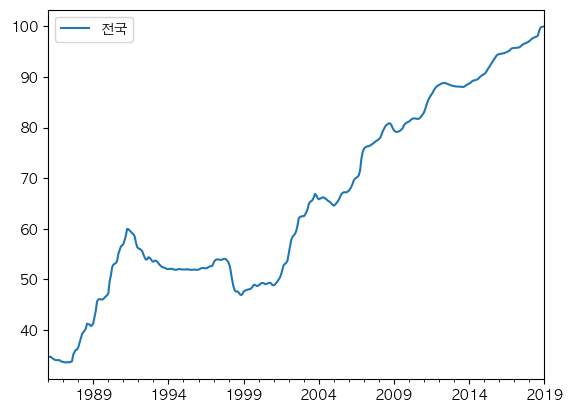

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
# 전국매매가격지수를 1986년 1월 이후로 그래프 그리기
new_data['전국']['전국'].plot(legend='전국')
plt.show()

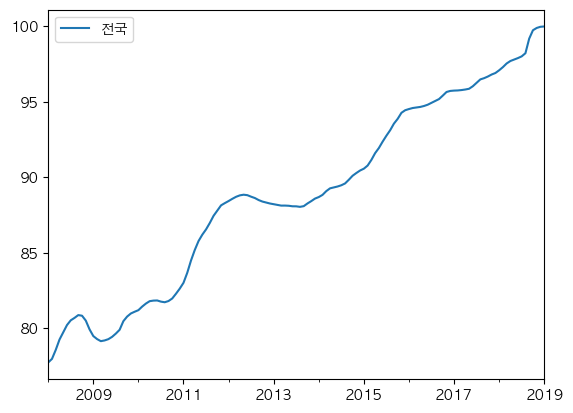

In [17]:
# 전국매매가격지수를 2008년 1월 이후로 그래프 그리기
new_data['전국']['전국']['2008-01':].plot(legend='전국') #우리데이터를보면 컬럼은 큰도시안에 작은도시로 나눠져있음

plt.show()


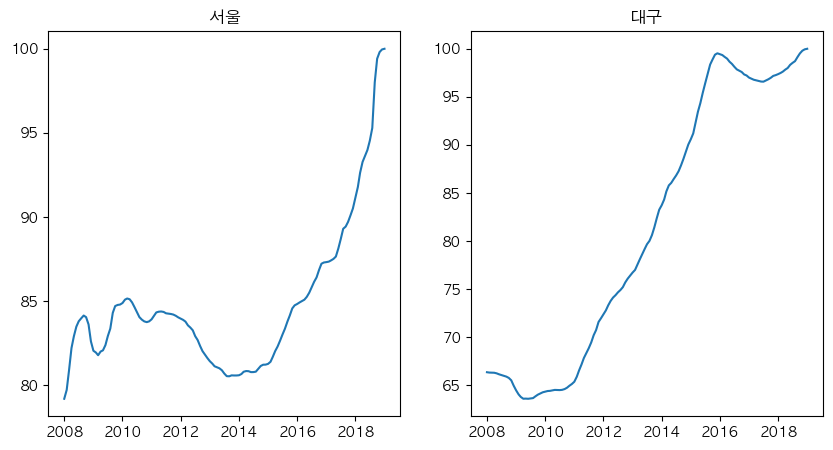

In [18]:
# matplotlib의 서브플롯으로 여러 그래프를 한번에 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('서울')
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(1, 2, 2)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()

In [ ]:
spots = '전국 서울 대구 부산' # col정하기 (광역시)
start_date = '2008-1' # 인덱스정하기 (날짜)
spot_list = spots.split(' ') # 들어갈 문자열 전국 서울 대구 부산을 잘라서 리스트로 만들기
num_row = int((len(spot_list)-1)/2)+1 # 몇개의 그래프를 그릴지 정하기

plt.figure(figsize=(10, num_row*5)) 
for i, spot in enumerate(spot_list): # for문으로 돌리기
    plt.subplot(num_row, 2, i+1) # 서브플롯 그리기 행, 열, 순서
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])
    
plt.show()

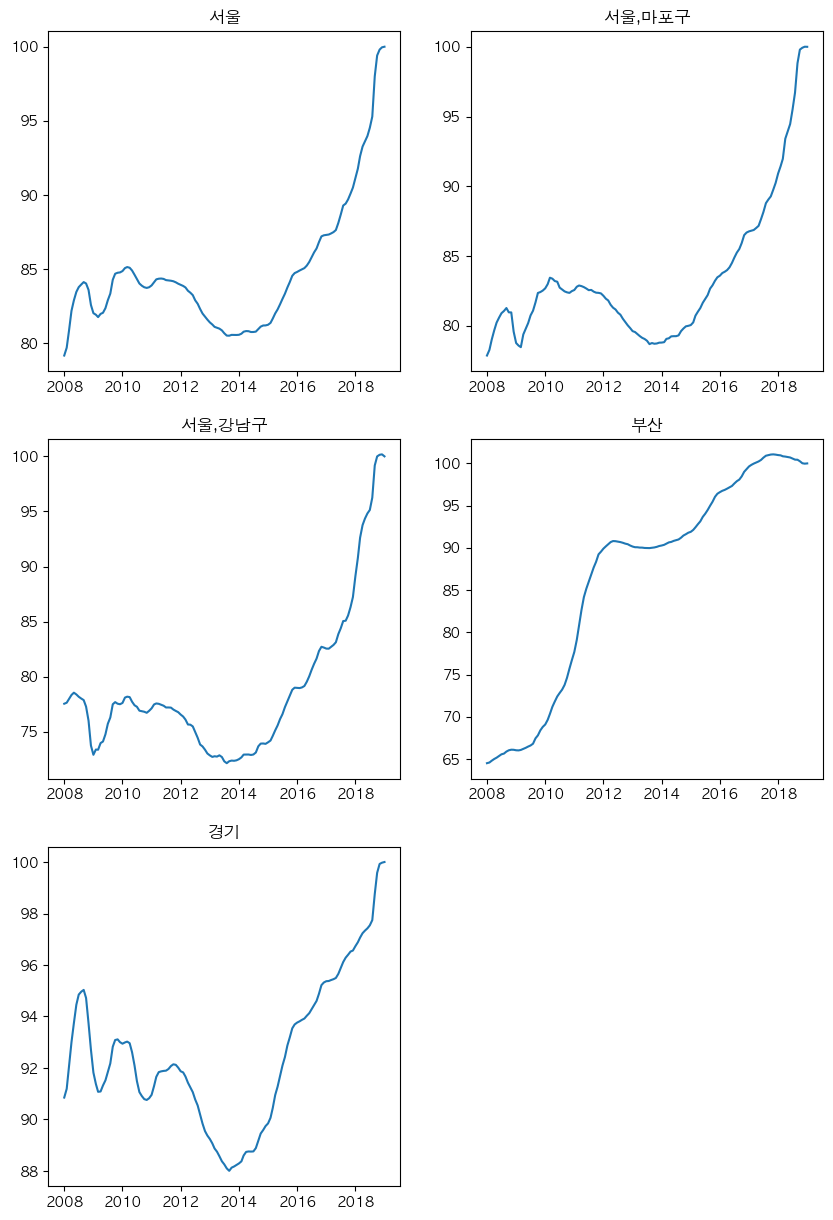

In [ ]:
spots = '서울 서울,마포구 서울,강남구 부산 경기' # col정하기 (군,구)
start_date = '2008-1' # 인덱스정하기 (날짜)
spot_list = spots.split(' ') # 들어갈 문자열 전국 서울 대구 부산을 잘라서 리스트로 만들기
num_row = int((len(spot_list)-1)/2)+1 # 몇개의 그래프를 그릴지 정하기

plt.figure(figsize=(10, num_row*5)) 
for i, spot in enumerate(spot_list): # for문으로 돌리기
    plt.subplot(num_row, 2, i+1) # 서브플롯 그리기 행, 열, 순서
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])
    
plt.show()

In [21]:
new_data.loc['2018-1-1'] # 특정 날짜 전 지역 가격지수 데이터 가져오기

전국    전국       97.094414
서울    서울       91.149375
      강북       91.608014
      강북구      96.180593
      광진구      94.370979
                 ...    
경남    김해      105.989187
      통영            None
제주도   제주도           None
      서귀포      99.385633
기타지방  기타지방    101.671326
Name: 2018-01-01 00:00:00, Length: 186, dtype: object

In [22]:
# 두 날짜 사이의 가격지수 증감률 계산
(new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100

전국    전국      2.717822
서울    서울      7.459164
      강북      6.288654
      강북구     3.502375
      광진구     6.178483
                ...   
경남    김해     -3.275658
      통영           NaN
제주도   제주도          NaN
      서귀포      3.53906
기타지방  기타지방   -1.108543
Length: 186, dtype: object

In [23]:
diff = (new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100
diff.sort_values()

경남   성산구   -10.588477
경북   구미     -7.297924
경남   의창구    -6.394714
     창원     -5.338448
경북   북구     -5.082983
              ...    
     김천           NaN
경남   양산           NaN
     거제           NaN
     통영           NaN
제주도  제주도          NaN
Length: 186, dtype: object

In [24]:
diff = ((new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100).dropna() #nan값 제거
print("하위 10개")
print(diff.sort_values()[:10])
print(' ')
print("상위 10개")
print(diff.sort_values(ascending=False)[:10])

하위 10개
경남  성산구   -10.588477
경북  구미     -7.297924
경남  의창구    -6.394714
    창원     -5.338448
경북  북구     -5.082983
경남  진해구    -4.975431
경북  경북     -4.957619
울산  동구     -4.594578
충북  상당구    -4.476693
울산  북구     -4.458143
dtype: object
 
상위 10개
서울  강남구     12.831181
경기  분당구     11.066415
서울  서초구     10.354472
    송파구     10.229412
    영등포구    10.171195
    성동구      9.575116
    강동구      9.076968
    마포구      8.764148
    강남       8.617133
    양천구      8.282181
dtype: object


역시 이때도 강남,분당,서초,,,,

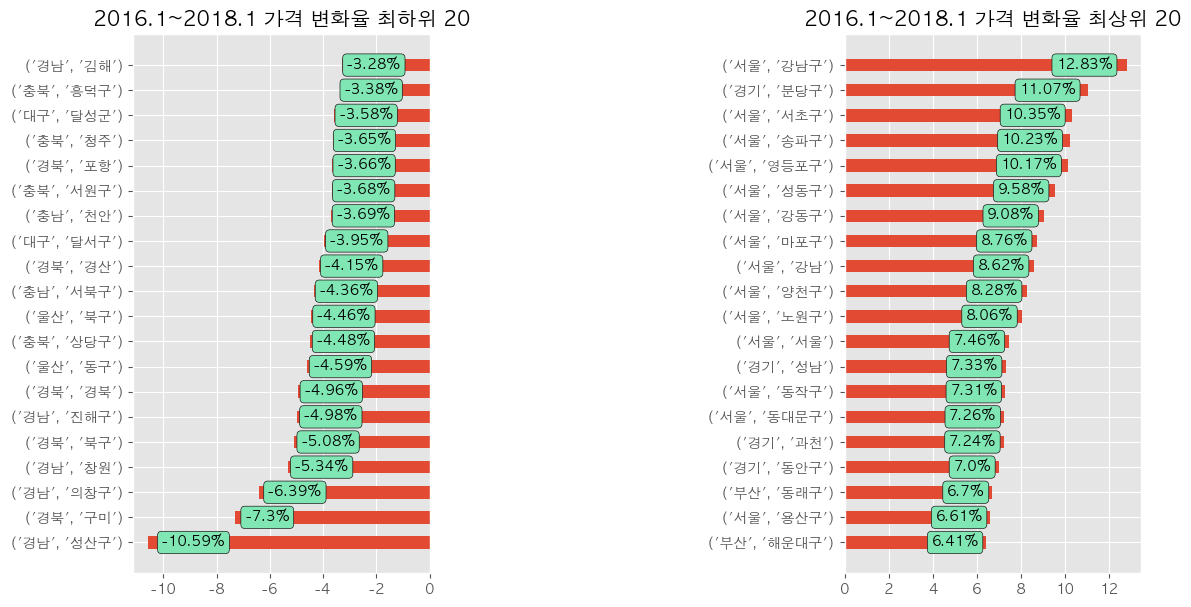

In [25]:
# 증감률 시각화
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(13, 7))
ind = np.arange(20)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1~2018.1 가격 변화율 최하위 20')
rects = plt.barh(ind, diff.sort_values()[:20].values,  align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
            str(round(diff.sort_values()[:20].values[i],2)) + '%',
            ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))
    
ax2 = fig.add_subplot(1, 3, 3)
plt.title('2016.1~2018.1 가격 변화율 최상위 20')
rects2 = plt.barh(ind, diff.sort_values()[-20:].values,  align='center', height=0.5)
plt.yticks(ind,  diff.sort_values()[-20:].index)
for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
             rect.get_y() + rect.get_height() / 2.0,
             str(round(diff.sort_values()[-20:].values[i],2)) + '%', 
             ha='right', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))

plt.show()

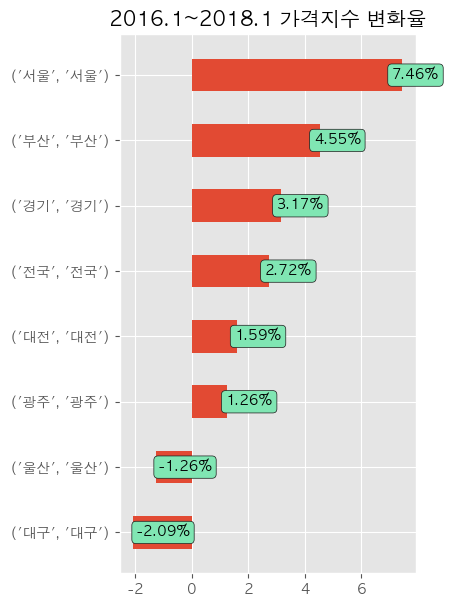

In [26]:
# 특정 지역만 선택해서 가격지수 증감률을 막대그래프로 시각화하기
loca =  '전국 서울 부산 경기 대구 광주 울산 대전'

temp_list = loca.split(" ")
loca_list = []
for temp in temp_list:
    if ',' in temp:
        temp_split = temp.split(",")
        loca_list.append((temp_split[0], temp_split[1]))
    else:
        loca_list.append((temp, temp))

diff = ((new_data.loc['2018-1-1', loca_list] - new_data.loc['2016-1-1', loca_list]) / new_data.loc['2016-1-1', loca_list] * 100).sort_values()

num = len(loca_list)
fig = plt.figure(figsize=(13, 7))
ind = np.arange(num)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1~2018.1 가격지수 변화율') 
rects = plt.barh(ind, diff.head(num).values,  align='center', height=0.5)
plt.yticks(ind, diff.head(num).index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(round(diff.head(20).values[i], 2)) + '%',
            ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))


plt.show()